In [1]:
from transformers import pipeline
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle
from PIL import Image
from urllib.request import urlopen
from io import BytesIO
from base64 import b64decode

# AudioClassificationPipeline pipeline("audio-classification")
# speech to text https://github.com/whitphx/streamlit-webrtc
# style transfer https://github.com/whitphx/streamlit-webrtc
# https://github.com/pytorch/examples/tree/master/fast_neural_style

In [3]:
text_classifier = pipeline("sentiment-analysis")
tc_in = "We are very happy to show you the 🤗 Transformers library."
tc_out = text_classifier(tc_in)

for out in tc_out:
    print(f"The sentiment is {out['label']} with a score of {out['score']:.3f}")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)


The sentiment is POSITIVE with a score of 1.000


In [4]:
text_unmasker = pipeline("fill-mask")
mask_token = text_unmasker.tokenizer.mask_token
tm_in = f"HuggingFace is creating a {mask_token} that the community uses to solve NLP tasks."
tm_out = text_unmasker(tm_in)

for out in tm_out:
    print(tm_in.replace(mask_token, f"**{out['token_str'].strip()}**"))

No model was supplied, defaulted to distilroberta-base (https://huggingface.co/distilroberta-base)


HuggingFace is creating a **tool** that the community uses to solve NLP tasks.
HuggingFace is creating a **framework** that the community uses to solve NLP tasks.
HuggingFace is creating a **library** that the community uses to solve NLP tasks.
HuggingFace is creating a **database** that the community uses to solve NLP tasks.
HuggingFace is creating a **prototype** that the community uses to solve NLP tasks.


In [5]:
text_generator = pipeline("text-generation")
tg_in = "As far as I am concerned, I will"
tg_out = text_generator(tg_in)

for out in tg_out:
    print(out["generated_text"])

No model was supplied, defaulted to gpt2 (https://huggingface.co/gpt2)
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


As far as I am concerned, I will keep on with the work I'm doing because all I feel like is working on it.

The thing is, I did write this post because I'm excited about the upcoming games, and to the


In [6]:
text_translator = pipeline("translation_en_to_fr")
tt_in = "Hugging Face is a technology company based in New York and Paris"
tt_out = text_translator(tt_in)

for out in tt_out:
    print(out["translation_text"])

No model was supplied, defaulted to t5-base (https://huggingface.co/t5-base)


Hugging Face est une entreprise technologique basée à New York et à Paris.


In [7]:
image_classifier = pipeline("image-classification")
ic_in = "https://post.medicalnewstoday.com/wp-content/uploads/sites/3/2020/02/322868_1100-800x825.jpg"
ic_out = image_classifier(ic_in)

print("Top five predictions:\n")
for out in ic_out:
    print(f"- Predicting {out['label']} with a score of {out['score']:.2f}")

No model was supplied, defaulted to google/vit-base-patch16-224 (https://huggingface.co/google/vit-base-patch16-224)


Top five predictions:

- Predicting golden retriever with a score of 0.49
- Predicting Labrador retriever with a score of 0.19
- Predicting Chesapeake Bay retriever with a score of 0.07
- Predicting Brittany spaniel with a score of 0.06
- Predicting vizsla, Hungarian pointer with a score of 0.03


No model was supplied, defaulted to facebook/detr-resnet-50-panoptic (https://huggingface.co/facebook/detr-resnet-50-panoptic)


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


/opt/mambaforge/envs/cs152/lib/python3.9/site-packages/transformers/models/detr/modeling_detr.py:412: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  dim_t = self.temperature ** (2 * (dim_t // 2) / self.embedding_dim)
/opt/mambaforge/envs/cs152/lib/python3.9/site-packages/torch/nn/functional.py:3631: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  warnings.warn(


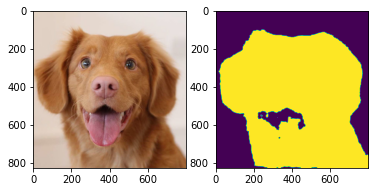

In [8]:
image_segmenter = pipeline("image-segmentation")
is_in = "https://post.medicalnewstoday.com/wp-content/uploads/sites/3/2020/02/322868_1100-800x825.jpg"
is_out = image_segmenter(is_in)

for out in is_out:
    mask = Image.open(BytesIO(b64decode(out["mask"])))
    img = Image.open(urlopen(is_in))

    _, (ax1, ax2) = plt.subplots(1, 2)
    ax1.imshow(img)
    ax2.imshow(mask)

No model was supplied, defaulted to facebook/detr-resnet-50 (https://huggingface.co/facebook/detr-resnet-50)


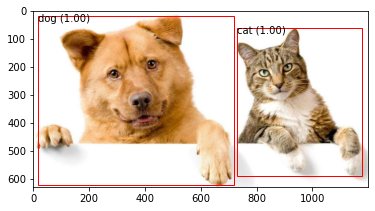

In [9]:
image_detector = pipeline("object-detection")
id_in = (
    "https://storage.googleapis.com/petbacker/images/blog/2017/dog-and-cat-cover.jpg"
)
id_out = image_detector(id_in)

img = Image.open(urlopen(id_in))
plt.imshow(img)

for out in id_out:
    x, y = out["box"]["xmin"], out["box"]["ymin"]
    width = out["box"]["xmax"] - out["box"]["xmin"]
    height = out["box"]["ymax"] - out["box"]["ymin"]
    plt.gca().add_patch(
        Rectangle((x, y), width, height, linewidth=1, edgecolor="r", facecolor="none")
    )
    plt.text(x, y + 20, f"{out['label']} ({out['score']:.2f})")

In [10]:
from torch import hub

In [11]:
model = hub.load(
    "AK391/animegan2-pytorch:main",
    "generator",
    pretrained=True,
    device="cuda",
    progress=True,
)

Using cache found in /raid/cs152/cache/pytorch/hub/AK391_animegan2-pytorch_main


In [12]:
face2paint = hub.load(
    'AK391/animegan2-pytorch:main', 'face2paint', 
    size=512, device="cuda",side_by_side=False
)

Using cache found in /raid/cs152/cache/pytorch/hub/AK391_animegan2-pytorch_main


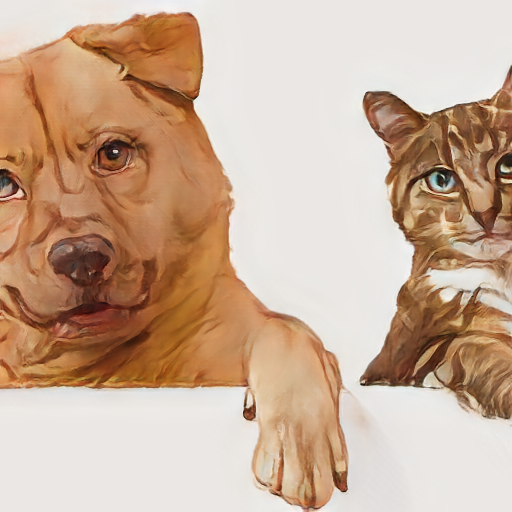

In [13]:
face2paint(model, img)

In [14]:
x = face2paint(model, img)

In [16]:
type(x)

PIL.Image.Image